In [1]:
import pymc3 as pm

In [9]:
import numpy as np
from lightkurve import search_lightcurvefile

def get_lightcurve(target, **kwargs):
    lc_collection = search_lightcurvefile(target, **kwargs).download_all()

    lc = lc_collection[0].PDCSAP_FLUX.normalize()
    for l in lc_collection[1:]:
        lc = lc.append(l.PDCSAP_FLUX.normalize())

    lc = lc.remove_nans()
    return lc

In [10]:
lc = get_lightcurve('KIC 5302006')

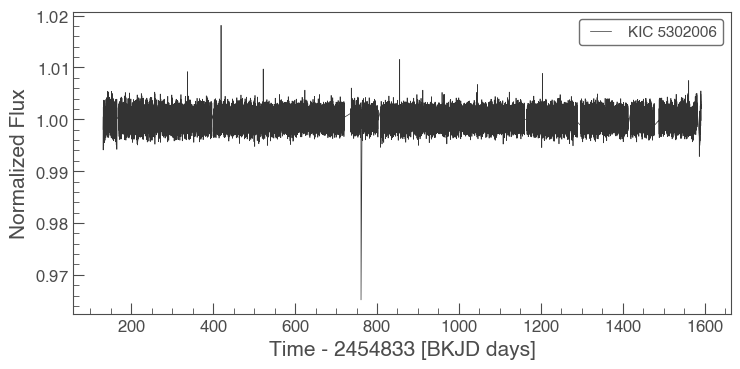

In [11]:
lc.plot()

In [ ]:
lc.to_periodogram().plot()

In [3]:
with pm.Model() as model:
    pm.Normal('test', mu=0.1, sd=0.1)

In [4]:
with model:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [test]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:00<00:00, 3447.28draws/s]


In [7]:
from pymc3.model import Model


class Test(Model):
    
    def __init__(self, a=None):
        self.a = a

In [8]:
Test(a = pm.Normal('a', mu=0.1, sd=0.))

TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.